# Name : Karthik Kumar Reddy Kota



# Question 1: If I want to read multiple images from folder/URLs then use the following code

In [1]:
import glob
import cv2 as cv


path = glob.glob("/content/*.jpg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)

# Question 2: Draw the following image using OpenCV 

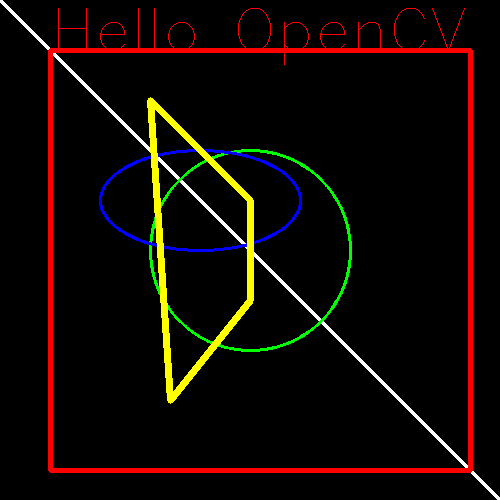

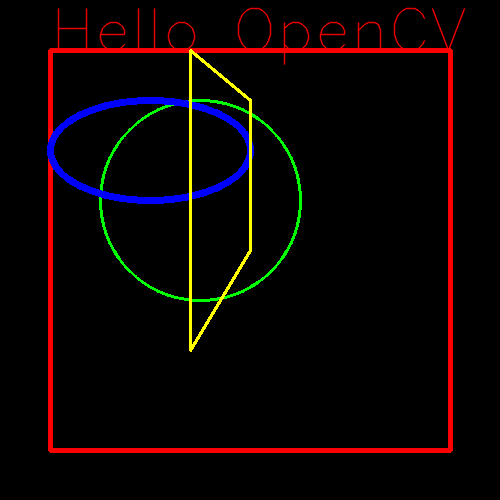

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
# path 
image = np.zeros((500,500,3), dtype="uint8")
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, 'Hello OpenCV', (50, 50),font, 2, (0, 0, 255), 1, cv2.LINE_AA)
image = cv2.rectangle(image, (50, 50), (450, 450), (0, 0, 255),4)
image = cv2.circle(image,  (200,200), 100, (0,255, 0), 2)
image = cv2.ellipse(image, (150, 150), (100, 50),0, 0, 360, (255, 0,0 ), 5)
pts = np.array([[250,250],[250,100],[190,50],[190,350]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(image,[pts],True,(0,255,255),2)
cv2.imshow(image)


# Question 3: Explore other morphological operations like Dilation, Opening and Closing

Dilation 1


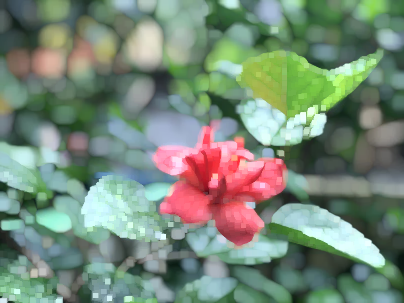

Dilation 2


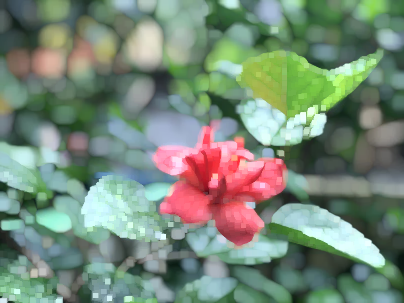

After Opening Morphological Operation


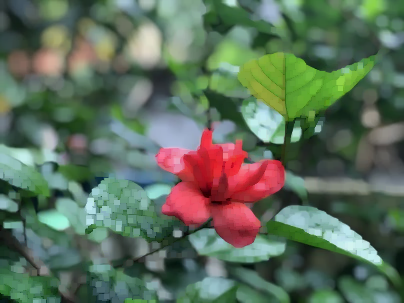

After Closing Morphological Operation


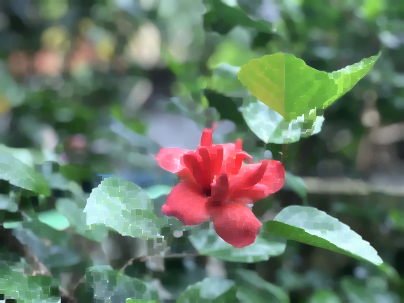

In [3]:
image2 = cv2.imread('/content/flower1.jpg')
kernel = np.ones((5,5), np.uint8)
for i in range(1,3):
   print("Dilation",i)
   img_dilation = cv2.dilate(image2, kernel)
   cv2.imshow(img_dilation)
opening = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel)
print("After Opening Morphological Operation")
cv2.imshow(opening)
closing = cv2.morphologyEx(image2, cv2.MORPH_CLOSE, kernel)
print("After Closing Morphological Operation")
cv2.imshow(closing)


# Question 4: Identify the operations which removed text or water mark from the elephant image


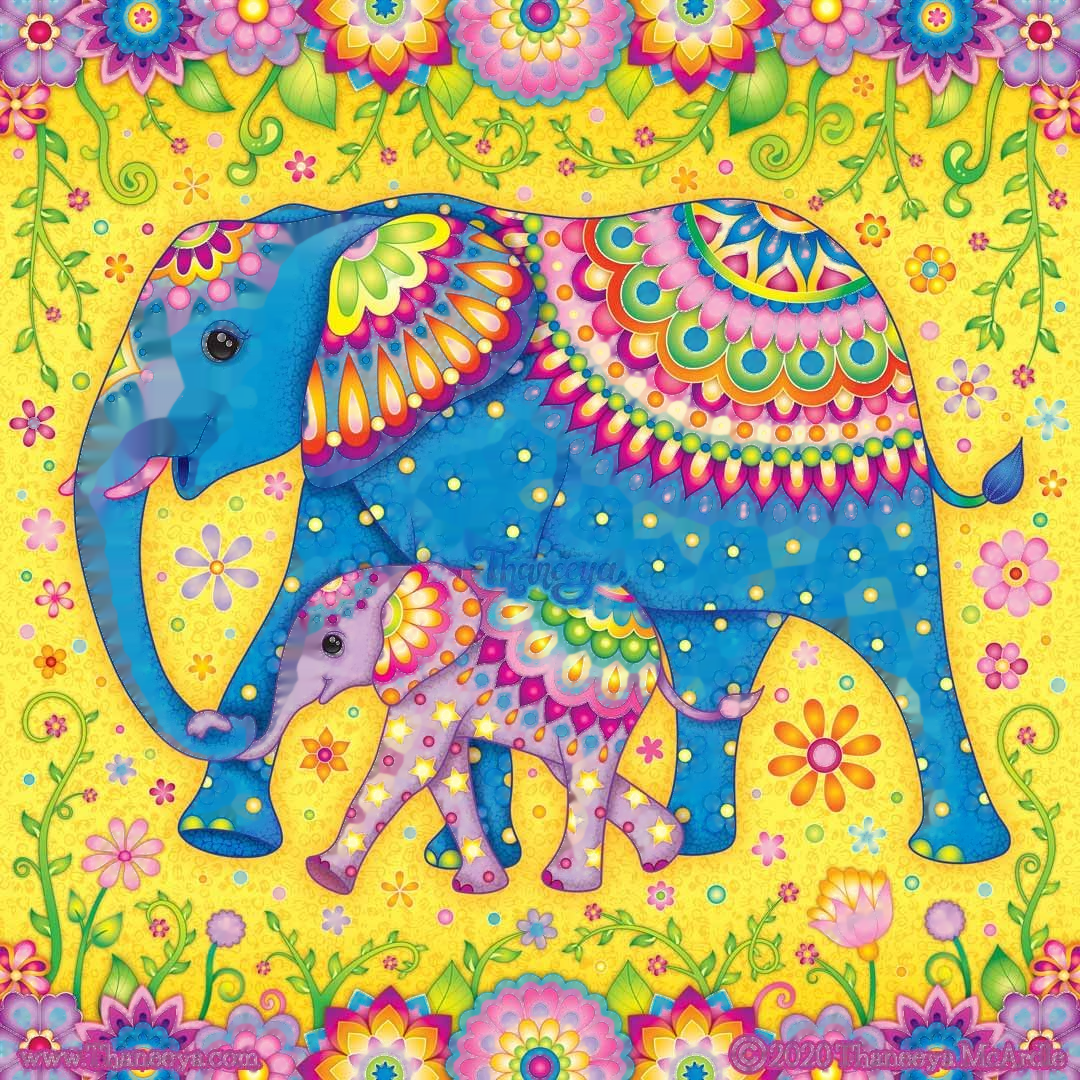

In [4]:
img = cv2.imread('/content/elephant.jpeg')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
cv2.imshow(dst)

# Question 5: Explore all other Geometric Operations like Translation, Flipping, Rotation and Cropping

Original Image


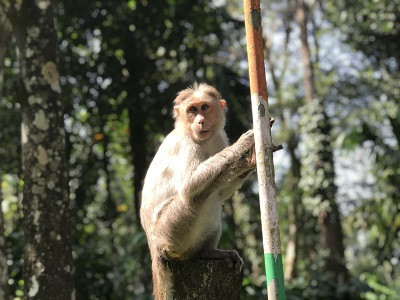

Translation Image


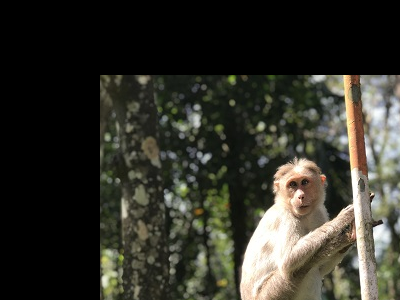

Cropped Image


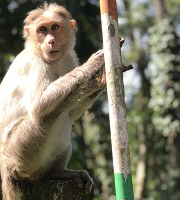

Rotated Image


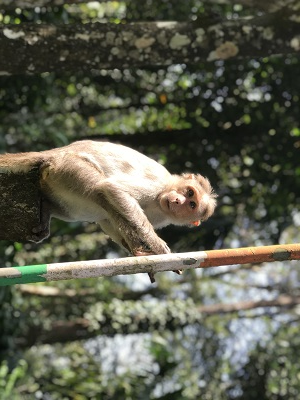

Flipped Image


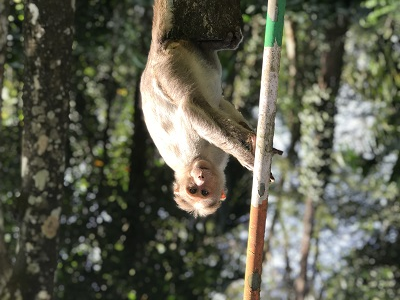

In [5]:
image4 = cv2.imread('/content/monkey1.JPG')
height, width = image4.shape[:2]
quarter_height, quarter_width = height / 4, width / 4
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
img_translation = cv2.warpAffine(image4, T, (width, height))  
cropped_image = image4[80:280, 150:330]
rotated_image = cv2.rotate(image4, cv2.cv2.ROTATE_90_CLOCKWISE)
flipped_image = cv2.flip(image4, 0)
print("Original Image")
cv2.imshow(image4)
print("Translation Image")
cv2.imshow(img_translation)
print("Cropped Image")
cv2.imshow(cropped_image)
print("Rotated Image")
cv2.imshow(rotated_image)
print("Flipped Image")
cv2.imshow(flipped_image)


# Question 6: Remove/Reduce the dots and improve the clarity

#Hint: Use smoothing techniques

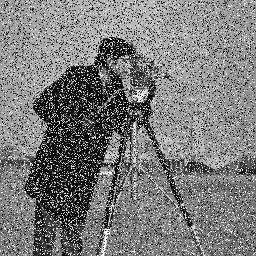

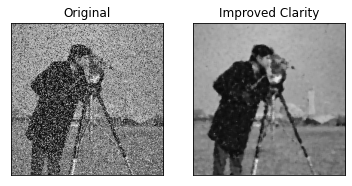

In [6]:
img = cv2.imread('/content/index.png')

blur = cv.blur(img,(1,1))
median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Improved Clarity')
plt.xticks([]), plt.yticks([])
plt.show()


# Question 7: Explore other thresholding techniques like OTSU and Adaptive thresholding

OTSU Thresholding Technique


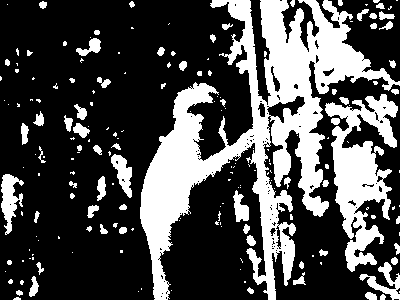

Adaptive Mean


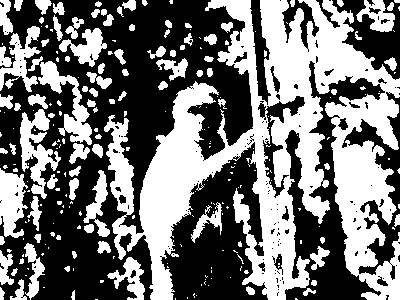

Adaptive Gaussian


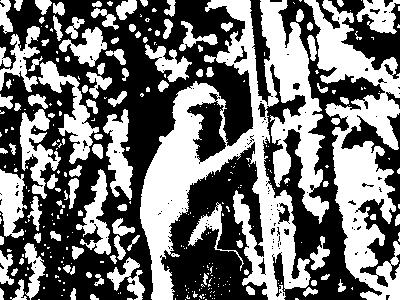

In [7]:
image5 = cv2.imread('/content/monkey1.JPG')
img = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
print("OTSU Thresholding Technique")
cv2.imshow(thresh1)    
img = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5)  
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
print('Adaptive Mean')
cv2.imshow( thresh1)
print('Adaptive Gaussian')
cv2.imshow( thresh2)
  

# Question 8: Perform Histogram Equalization and improve the clarity of the following image

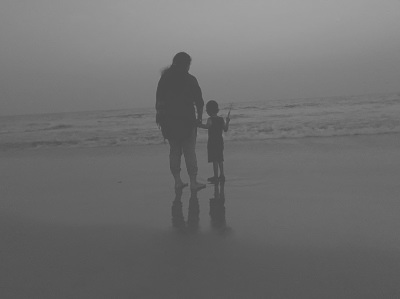

Original Image


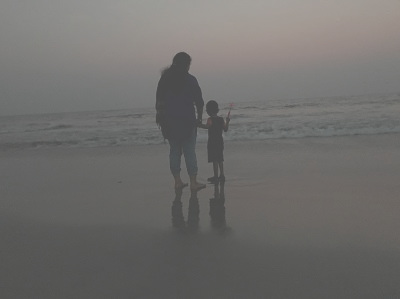

Improved Clarity in the above original Image


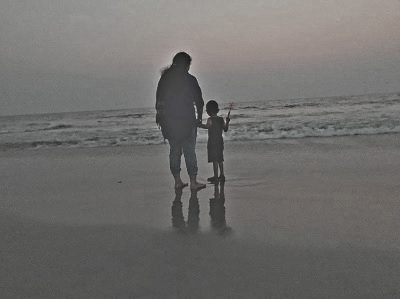

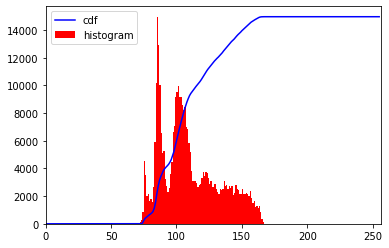

In [8]:
image6=cv.imread("/content/beach.jpg")
print("Original Image")
cv2.imshow(image6)
dst = cv2.detailEnhance(image6, sigma_s=10, sigma_r=0.15)
print("Improved Clarity in the above original Image")
cv2.imshow(dst)
hist,bins = np.histogram(image6.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image6.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Question 9: Detect Contours  for the following image and display the count

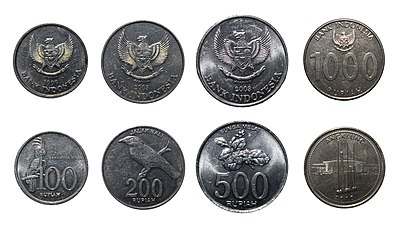

Canny Edges After Contouring


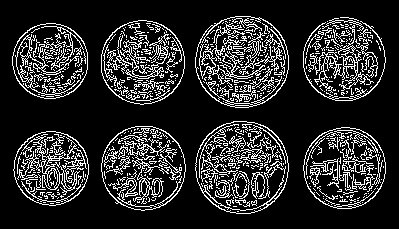

Number of Contours found = 91


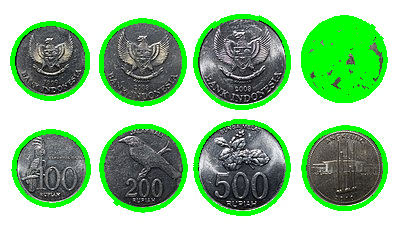

In [9]:
image7 = cv2.imread('/content/rupiah.jpg')
  
# Grayscale
gray = cv2.cvtColor(image7, cv2.COLOR_BGR2GRAY)  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Canny Edges After Contouring')
cv2.imshow( edged)

print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image7, contours, -1, (0, 255, 0), 3)
  
cv2.imshow( image7)


# Question 10: Do Face Detection using the above knowledge and Haar Cascade Classifer

Before Detection


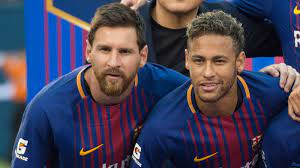

After Detection


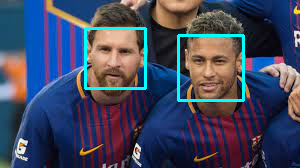

In [10]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') 
image8 = cv2.imread('img.jpg')
print("Before Detection")

cv2.imshow(image8)
gray = cv2.cvtColor(image8, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)  
for (x,y,w,h) in faces: 
    cv2.rectangle(image8,(x,y),(x+w,y+h),(255,255,0),2) 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w] 
print("After Detection")  

cv2.imshow(image8)
    